# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import plotly.express as px
import yfinance as yf
from plotly import graph_objects as go

In [35]:
# Definindo os ativos e o período de tempo
ativos = '^BVSP'
inicio = '2022-01-01'
fim = '2024-07-16'

# Baixando os dados dos ativos
dados_ativos = yf.download(ativos, start=inicio, end=fim)
dados_ativos

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,104823.0,106125.0,103413.0,103922.0,103922.0,11128500
2022-01-04,103922.0,104276.0,103096.0,103514.0,103514.0,11491600
2022-01-05,103514.0,103514.0,100850.0,101006.0,101006.0,0
2022-01-06,101006.0,102235.0,101000.0,101561.0,101561.0,11749200
2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200
...,...,...,...,...,...,...
2024-07-09,126548.0,127295.0,125937.0,127108.0,127108.0,6684600
2024-07-10,127109.0,127769.0,126928.0,127218.0,127218.0,8152600
2024-07-11,127221.0,128326.0,127221.0,128294.0,128294.0,7972900


In [36]:
dados_ativos.to_csv('dados_ativos_2')

In [42]:
ativos = ["ITUB3.SA", "PETR4.SA", "ABEV3.SA", "VALE3.SA"]

In [71]:
# Corrigindo o nome do arquivo e carregando novamente
dados_ativos_corrigidos = pd.read_csv('dados_ativos_2')
dados_ativos_corrigidos.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,104823.0,106125.0,103413.0,103922.0,103922.0,11128500
1,2022-01-04,103922.0,104276.0,103096.0,103514.0,103514.0,11491600
2,2022-01-05,103514.0,103514.0,100850.0,101006.0,101006.0,0
3,2022-01-06,101006.0,102235.0,101000.0,101561.0,101561.0,11749200
4,2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200


In [72]:
# Calculando a amplitude de variação diária (High - Low)
dados_ativos_corrigidos['Amplitude'] = dados_ativos_corrigidos['High'] - dados_ativos_corrigidos['Low']
dados_ativos_corrigidos.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude
0,2022-01-03,104823.0,106125.0,103413.0,103922.0,103922.0,11128500,2712.0
1,2022-01-04,103922.0,104276.0,103096.0,103514.0,103514.0,11491600,1180.0
2,2022-01-05,103514.0,103514.0,100850.0,101006.0,101006.0,0,2664.0
3,2022-01-06,101006.0,102235.0,101000.0,101561.0,101561.0,11749200,1235.0
4,2022-01-07,101561.0,102719.0,101104.0,102719.0,102719.0,11733200,1615.0


In [76]:
numero_linhas = len(dados_ativos_corrigidos)
numero_ativos = 4  # Quantidade de ativos mencionados
linhas_por_ativo = numero_linhas // numero_ativos

dados_por_ativo = {}

# Dividir o DataFrame original em partes para cada ativo
for i, ativo in enumerate(ativos):
    inicio = i * linhas_por_ativo
    fim = inicio + linhas_por_ativo
    dados_por_ativo[ativo] = dados_ativos_corrigidos.iloc[inicio:fim]

# Calcular a média da amplitude para cada ativo
media_amplitude_por_ativo = {ativo: dados['Amplitude'].mean() for ativo, dados in dados_por_ativo.items()}
media_amplitude_por_ativo

{'ITUB3.SA': 1858.892405063291,
 'PETR4.SA': 2202.8544303797466,
 'ABEV3.SA': 1650.9810126582279,
 'VALE3.SA': 1395.1772151898733}

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [82]:
# Calculando a média móvel de 90 dias para o valor de fechamento ajustado de cada ativo
for ativo, dados in dados_por_ativo.items():
    dados_por_ativo[ativo]['Media_Movel_90'] = dados['Adj Close'].rolling(window=90).mean()

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_9908\3251903128.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
# Exibir os dados com a média móvel de 90 dias para todos os ativos
for ativo, dados in dados_por_ativo.items():
    print(f"Exibindo dados para: {ativo}")
    print(dados[['Date', 'Adj Close', 'Media_Movel_90']].tail(), "\n")

Exibindo dados para: ITUB3.SA
           Date  Adj Close  Media_Movel_90
153  2022-08-11   109718.0   105922.922222
154  2022-08-12   112764.0   105854.911111
155  2022-08-15   113032.0   105797.177778
156  2022-08-16   113512.0   105737.733333
157  2022-08-17   113708.0   105686.466667 

Exibindo dados para: PETR4.SA
           Date  Adj Close  Media_Movel_90
311  2023-03-30   103713.0   107448.833333
312  2023-03-31   101882.0   107369.333333
313  2023-04-03   101506.0   107289.588889
314  2023-04-04   101869.0   107178.900000
315  2023-04-05   100978.0   107090.022222 

Exibindo dados para: ABEV3.SA
           Date  Adj Close  Media_Movel_90
469  2023-11-17   125062.0   117332.566667
470  2023-11-20   126095.0   117431.177778
471  2023-11-21   125607.0   117519.411111
472  2023-11-22   126035.0   117594.644444
473  2023-11-23   126576.0   117693.144444 

Exibindo dados para: VALE3.SA
           Date  Adj Close  Media_Movel_90
627  2024-07-08   126548.0   125631.044444
628  2024-07-0

In [86]:
# Calculando o desvio padrão com a mesma janela móvel de 90 dias para cada ativo
for ativo, dados in dados_por_ativo.items():
    dados_por_ativo[ativo]['Desvio_Padrao_90'] = dados['Adj Close'].rolling(window=90).std()

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_9908\3907013789.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
# Exibindo os dados com a média móvel de 90 dias e desvio padrão de 90 dias para todos os ativos
for ativo, dados in dados_por_ativo.items():
    print(f"Exibindo dados para: {ativo}")
    print(dados[['Date', 'Adj Close', 'Media_Movel_90', 'Desvio_Padrao_90']].tail(), "\n")

Exibindo dados para: ITUB3.SA
           Date  Adj Close  Media_Movel_90  Desvio_Padrao_90
153  2022-08-11   109718.0   105922.922222       6153.674775
154  2022-08-12   112764.0   105854.911111       6041.611389
155  2022-08-15   113032.0   105797.177778       5946.117949
156  2022-08-16   113512.0   105737.733333       5839.831492
157  2022-08-17   113708.0   105686.466667       5747.640527 

Exibindo dados para: PETR4.SA
           Date  Adj Close  Media_Movel_90  Desvio_Padrao_90
311  2023-03-30   103713.0   107448.833333       3834.105557
312  2023-03-31   101882.0   107369.333333       3874.768656
313  2023-04-03   101506.0   107289.588889       3921.006079
314  2023-04-04   101869.0   107178.900000       3931.959768
315  2023-04-05   100978.0   107090.022222       3980.958105 

Exibindo dados para: ABEV3.SA
           Date  Adj Close  Media_Movel_90  Desvio_Padrao_90
469  2023-11-17   125062.0   117332.566667       2715.103934
470  2023-11-20   126095.0   117431.177778       286

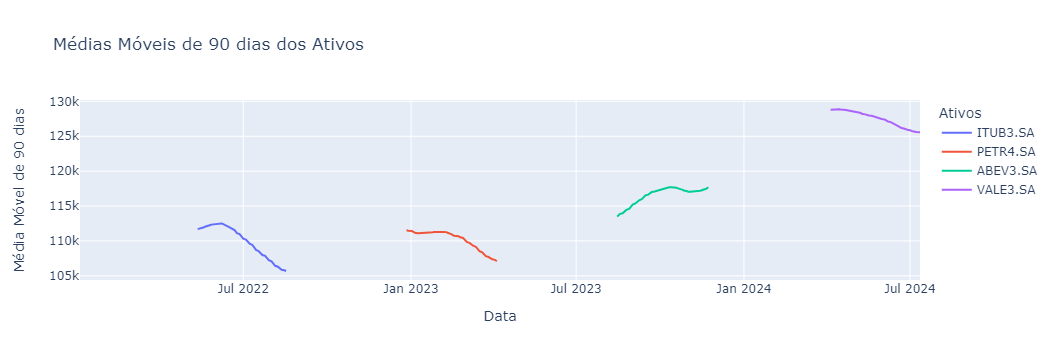

In [87]:
# Criando uma figura para o gráfico de linhas
fig = go.Figure()

# Adicionando uma linha para cada ativo
for ativo, dados in dados_por_ativo.items():
    fig.add_trace(go.Scatter(x=dados['Date'], y=dados['Media_Movel_90'], mode='lines', name=ativo))

# Configurando o layout do gráfico
fig.update_layout(title='Médias Móveis de 90 dias dos Ativos',
                  xaxis_title='Data',
                  yaxis_title='Média Móvel de 90 dias',
                  legend_title='Ativos')

fig.show()

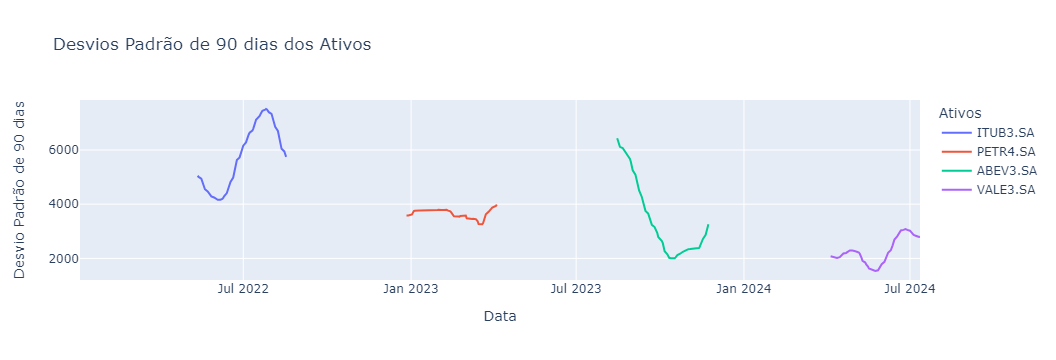

In [88]:
# Criando uma figura para o gráfico de linhas dos desvios padrão
fig_desvio = go.Figure()

# Adicionando uma linha para cada ativo
for ativo, dados in dados_por_ativo.items():
    fig_desvio.add_trace(go.Scatter(x=dados['Date'], y=dados['Desvio_Padrao_90'], mode='lines', name=ativo))

# Configurando o layout do gráfico
fig_desvio.update_layout(title='Desvios Padrão de 90 dias dos Ativos',
                         xaxis_title='Data',
                         yaxis_title='Desvio Padrão de 90 dias',
                         legend_title='Ativos')
fig_desvio.show()

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



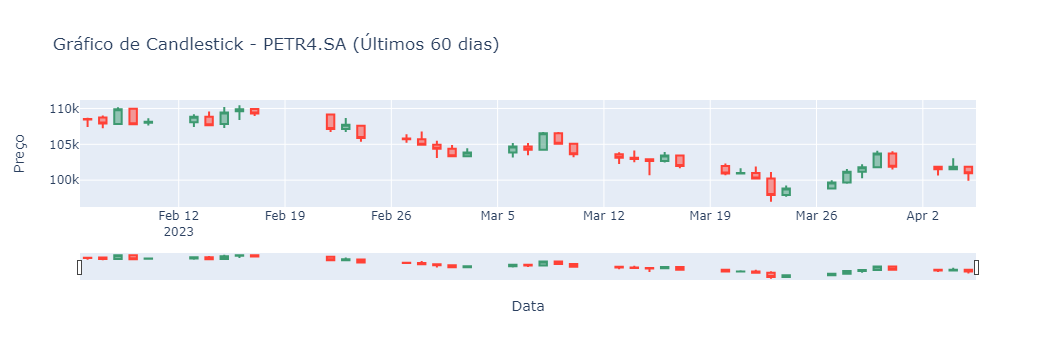

In [89]:
# Filtrando os dados dos últimos 60 dias para o ativo PETR4.SA
dados_petr4 = dados_por_ativo['PETR4.SA'].copy()
dados_petr4['Date'] = pd.to_datetime(dados_petr4['Date'])
dados_petr4_60_dias = dados_petr4[dados_petr4['Date'] >= (dados_petr4['Date'].max() - pd.Timedelta(days=60))]

# Criando o gráfico de candlestick
fig_candlestick = go.Figure(data=[go.Candlestick(x=dados_petr4_60_dias['Date'],
                                                 open=dados_petr4_60_dias['Open'],
                                                 high=dados_petr4_60_dias['High'],
                                                 low=dados_petr4_60_dias['Low'],
                                                 close=dados_petr4_60_dias['Close'],
                                                 name='PETR4.SA')])

# Configurando o layout do gráfico
fig_candlestick.update_layout(title='Gráfico de Candlestick - PETR4.SA (Últimos 60 dias)',
                              xaxis_title='Data',
                              yaxis_title='Preço',
                              legend_title='Ativo')
fig_candlestick.show()
